# Comparing Test Scores of Students (Confidence Intervals)

### Case Study

A school conducted two tests:

1. **Independent Samples**: Test scores of students from two different classes (Class A and Class B) are compared to determine if their mean scores differ significantly
2. **Dependent Samples**: Test scores of the same students before and after attending a special coaching session are compared to see if the coaching improved their performance.

Create synthtic dataset for independent and dependent samples:
1. **Independent Samples:** Test scores of students in Class A and Class B.
2. **Dependent Samples:** Test scores of the same students (before and after coaching)

In [6]:
import numpy as np
import scipy.stats as stats
import pandas as pd

In [8]:
# Step 1: Generate synthetic data
np.random.seed(42)  # For reproducibility

# Independent Samples: Test scores for Class A and Class B
class_a_scores = np.random.normal(75, 10, 30)  # Mean=75, SD=10, n=30
class_b_scores = np.random.normal(80, 12, 35)  # Mean=80, SD=12, n=35

# Dependent Samples: Test scores (Before and After coaching)
before_scores = np.random.normal(70, 8, 20)   # Mean=70, SD=8, n=20
after_scores = before_scores + np.random.normal(5, 3, 20)  # Coaching adds improvement


#### Formulas for calculating CI for independent samples

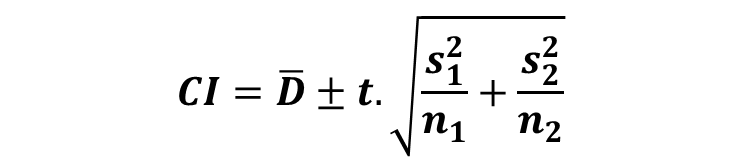

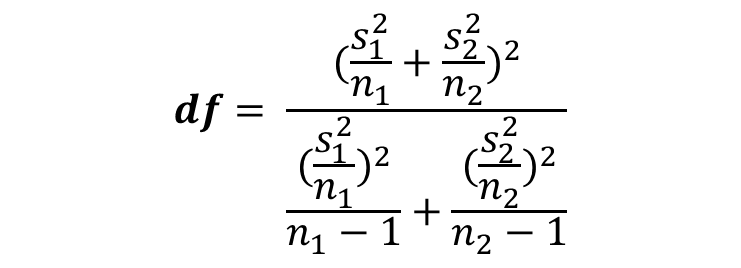

In [12]:
# Step 2: Confidence Intervals for Independent Samples
# 2.1 Compute means and standard errors
mean_a = np.mean(class_a_scores)
mean_b = np.mean(class_b_scores)
std_a = np.std(class_a_scores, ddof=1)
std_b = np.std(class_b_scores, ddof=1)
n_a, n_b = len(class_a_scores), len(class_b_scores)

# Standard Error
se_diff = np.sqrt((std_a**2 / n_a) + (std_b**2 / n_b))

# Degrees of Freedom (Welch's t-test approximation)
df = ((std_a**2 / n_a) + (std_b**2 / n_b))**2 / (
    ((std_a**2 / n_a)**2 / (n_a - 1)) + ((std_b**2 / n_b)**2 / (n_b - 1))
)
# Critical t-value
t_crit = stats.t.ppf(0.975, df)  # 95% CI

# Confidence Interval
margin_of_error = t_crit * se_diff
ci_independent = ((mean_a - mean_b) - margin_of_error, (mean_a - mean_b) + margin_of_error)

#### Formulas for calculating CI for dependent samples

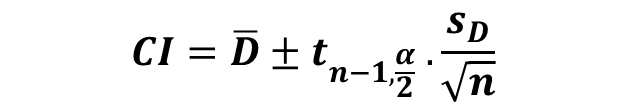
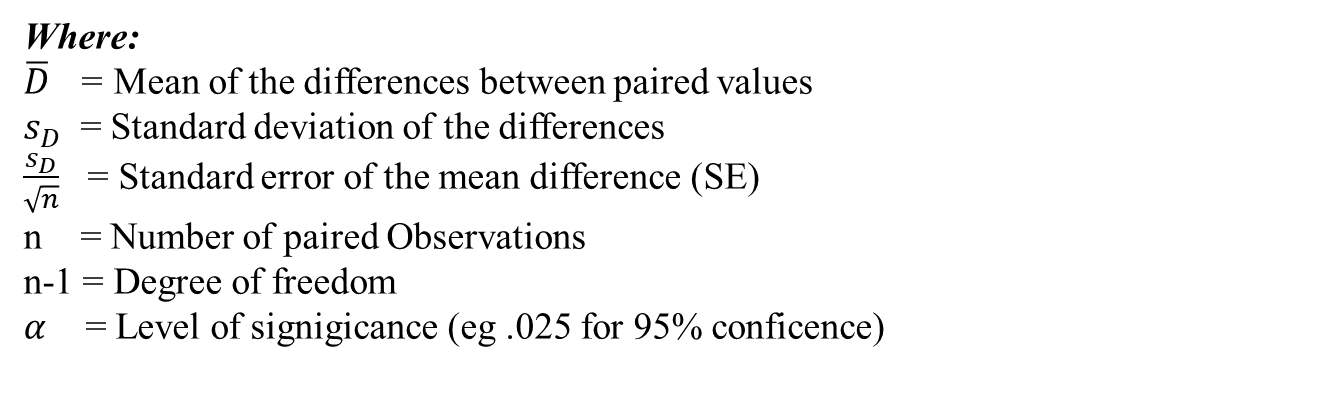

In [34]:
print(before_scores)
print(after_scores)

[80.84992023 69.42391903 78.02826318 72.8930882  64.83904196 72.89116484
 82.30429253 69.71339169 82.51714925 49.04203917 76.57522004 70.69637655
 67.6079412  70.73408621 54.09944868 68.2426249  72.85690057 81.82315236
 65.85383825 63.53205118]
[84.3446491  77.17012538 84.01451651 76.30380759 71.37884426 78.18239749
 90.2102275  72.60723241 86.53416281 52.86571471 77.18467519 76.58473738
 73.39110701 75.74942658 58.39568728 68.99651267 76.5949646  85.79500881
 68.44700645 68.04819404]


In [36]:
# Step 3: Confidence Intervals for Dependent Samples
# 3.1 Compute differences
differences = after_scores - before_scores
mean_diff = np.mean(differences)
std_diff = np.std(differences, ddof=1)
n_diff = len(differences)

# Standard Error
se_diff_dependent = std_diff / np.sqrt(n_diff)

# Critical t-value
t_crit_dependent = stats.t.ppf(0.975, n_diff - 1)

# Confidence Interval
margin_of_error_dependent = t_crit_dependent * se_diff_dependent
ci_dependent = (mean_diff - margin_of_error_dependent, mean_diff + margin_of_error_dependent)


In [16]:
# Step 4: Insights
insights = {
    "Independent Samples": {
        "Mean Difference": mean_a - mean_b,
        "Confidence Interval": ci_independent,
        "Interpretation": "Class B's mean score is higher than Class A's" 
        if ci_independent[0] > 0 else "Class A and B scores overlap."
    },
    "Dependent Samples": {
        "Mean Improvement": mean_diff,
        "Confidence Interval": ci_dependent,
        "Interpretation": "The coaching session improved scores"
        if ci_dependent[0] > 0 else "No significant improvement due to coaching."
    },
}

In [18]:
# Print Results
print("=== Confidence Interval Analysis ===\n")
print("1. Independent Samples:")
print(f"Mean Difference: {mean_a - mean_b:.2f}")
print(f"95% CI: {ci_independent}")
print(f"Insight: {insights['Independent Samples']['Interpretation']}\n")

print("2. Dependent Samples:")
print(f"Mean Improvement: {mean_diff:.2f}")
print(f"95% CI: {ci_dependent}")
print(f"Insight: {insights['Dependent Samples']['Interpretation']}\n")

=== Confidence Interval Analysis ===

1. Independent Samples:
Mean Difference: -4.90
95% CI: (-9.837304797224014, 0.044462719448907784)
Insight: Class A and B scores overlap.

2. Dependent Samples:
Mean Improvement: 4.41
95% CI: (3.5026945403721736, 5.324814236091827)
Insight: The coaching session improved scores

